<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexte-de-l'étude" data-toc-modified-id="Contexte-de-l'étude-1">Contexte de l'étude</a></span></li><li><span><a href="#Préparation-de-l'environnement-de-travail" data-toc-modified-id="Préparation-de-l'environnement-de-travail-2">Préparation de l'environnement de travail</a></span><ul class="toc-item"><li><span><a href="#Importation-des-librairies-et-des-fonctions-personnalisées" data-toc-modified-id="Importation-des-librairies-et-des-fonctions-personnalisées-2.1">Importation des librairies et des fonctions personnalisées</a></span></li><li><span><a href="#Importation-des-jeux-de-données" data-toc-modified-id="Importation-des-jeux-de-données-2.2">Importation des jeux de données</a></span></li><li><span><a href="#Récapitulatif-des-bases-de-données" data-toc-modified-id="Récapitulatif-des-bases-de-données-2.3">Récapitulatif des bases de données</a></span></li></ul></li><li><span><a href="#Visualisations-Univariées" data-toc-modified-id="Visualisations-Univariées-3">Visualisations Univariées</a></span><ul class="toc-item"><li><span><a href="#C'est-pas-de-la-tarte" data-toc-modified-id="C'est-pas-de-la-tarte-3.1">C'est pas de la tarte</a></span></li><li><span><a href="#Un-anneau-pour-les-admirer-tous" data-toc-modified-id="Un-anneau-pour-les-admirer-tous-3.2">Un anneau pour les admirer tous</a></span></li><li><span><a href="#“L'horizon-souligne-l'infini.”" data-toc-modified-id="“L'horizon-souligne-l'infini.”-3.3">“L'horizon souligne l'infini.”</a></span></li><li><span><a href="#Pas-de-barre,-pas-de-chocolat-!" data-toc-modified-id="Pas-de-barre,-pas-de-chocolat-!-3.4">Pas de barre, pas de chocolat !</a></span></li><li><span><a href="#Dupont-et-Dupond-?" data-toc-modified-id="Dupont-et-Dupond-?-3.5">Dupont et Dupond ?</a></span></li></ul></li><li><span><a href="#Visualisations-multivariées" data-toc-modified-id="Visualisations-multivariées-4">Visualisations multivariées</a></span><ul class="toc-item"><li><span><a href="#Visualisations-statiques" data-toc-modified-id="Visualisations-statiques-4.1">Visualisations statiques</a></span></li><li><span><a href="#Visualisations-intéractives" data-toc-modified-id="Visualisations-intéractives-4.2">Visualisations intéractives</a></span></li></ul></li></ul></div>

# Contexte de l'étude

Ce notebook présente les différentes visualisations des données.

L'analyse est basée sur le jeu de données Open Food Facts.

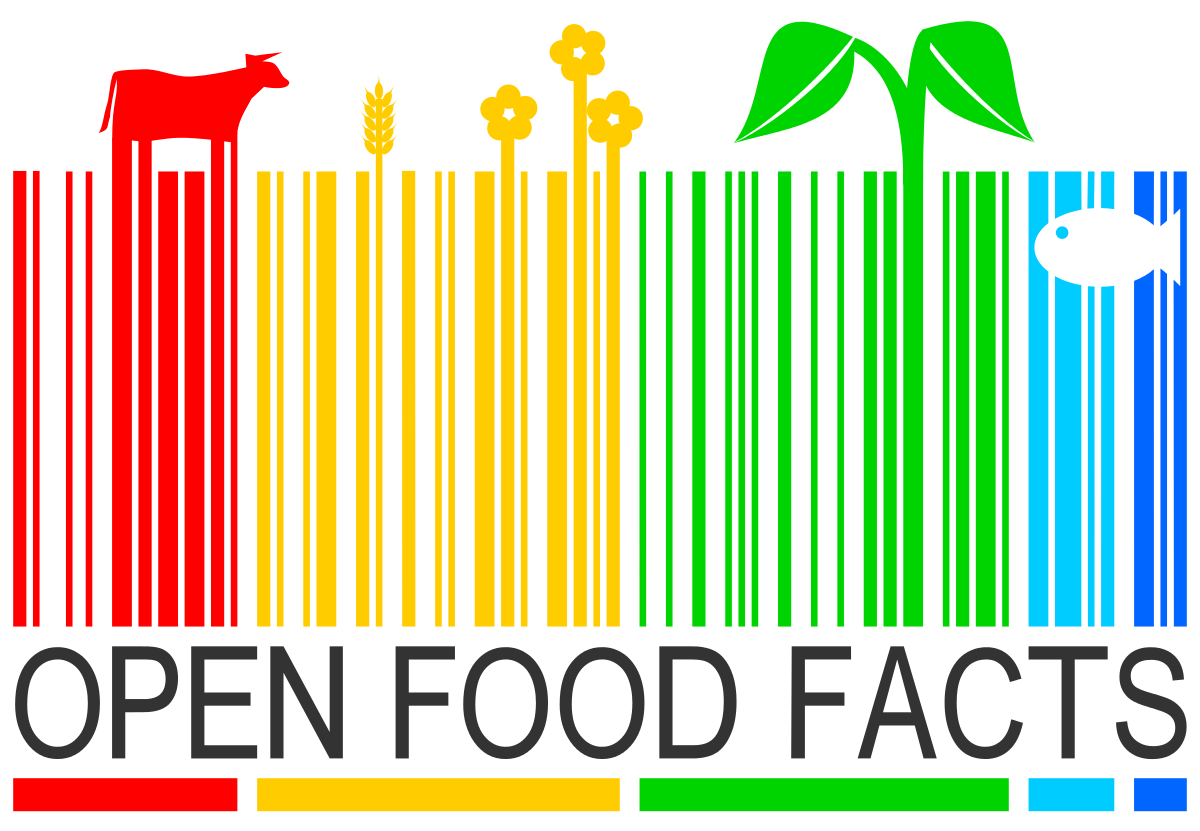

# Préparation de l'environnement de travail

## Importation des librairies et des fonctions personnalisées

Les librairies nécessaires pour l'étude sont importées dans l'environnement de travail.

In [1]:
import pandas as pd # Les bébés pandas naissent roses
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mes_packages.Optimus_Prime.description as my_desc
from mes_packages.Mystique_Raven.special_p3 import visualisation_map, visualisation_nutri_year
import mes_packages.Wanda_Maximoff.statiques as my_vis
import mes_packages.Wanda_Maximoff.interactives as my_move

## Importation des jeux de données

In [3]:
import os
from dotenv import load_dotenv  # Pour récupérer les variables d'environnement

load_dotenv('var.env')  # Importation des variables d'environnement

# Récupération des variables d'environnement
chemin = os.environ['CHEMIN']

In [4]:
df_net = pd.read_csv(chemin + "/export_df_net_test.csv",
                     sep='\t',
                     low_memory=False)
compte_additifs = pd.read_csv(chemin + "/export_compte_additifs.csv",
                              sep='\t',
                              low_memory=False)
compte_ingredients = pd.read_csv(chemin + "/export_compte_ingredients.csv",
                                 sep='\t',
                                 low_memory=False)
data_pnns = pd.read_csv(chemin + "/export_data_pnns.csv",
                        sep='\t',
                        low_memory=False)
data_packaging = pd.read_csv(chemin + "/export_data_packaging.csv",
                             sep='\t',
                             low_memory=False)
data_matiere = pd.read_csv(chemin + "/export_data_matiere.csv",
                           sep='\t',
                           low_memory=False)

## Récapitulatif des bases de données

In [5]:
df_net.head(2)  # Base de données principale

code   created_t               product_name brands_tags  \
0       0000000000017  1529059080           Vitória crackers     unknown   
1  000000000003327986  1574175736  Filetes de pollo empanado     unknown   

  labels_tags  serving_quantity  additives_n  ingredients_from_palm_oil_n  \
0     Unknown      2.040371e+08            2                            0   
1     Unknown      2.040371e+08            2                            0   

   ingredients_that_may_be_from_palm_oil_n  nutriscore_score  ... sodium_100g  \
0                                        0              14.0  ...        0.56   
1                                        0               9.0  ...        0.44   

   vitamin-a_100g vitamin-c_100g calcium_100g iron_100g countries  \
0         0.01246       0.077388     0.144409  0.015516    France   
1         0.01246       0.077388     0.144409  0.015516   Espagne   

   solide_ou_liquide  year  boisson_ou_aliment  score_fruits_vegetables  
0            Unknown  2018             aliment                        0  
1            Unknown  2019             aliment                        0  

[2 rows x 37 columns]

In [6]:
my_desc.data_informations(df_net)


*Fonction by Sandy M.*

---------------------------INFORMATION SUR LA BASE DE DONNEES-----------------------------------------------
Nombre de variables : 37
Nombre d'observations : 1527078
---------------------------VALEURS MANQUANTES---------------------------------------------------------------
Nombre de cellules avec des données manquantes :  2
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  2
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %
---------------------------VALEURS DUPLIQUEES---------------------------------------------------------------
Nombre de doublons dans la base de données :  0
Pourcentage de doublons dans la base de données :  0.0  %
---------------------------VALEURS OUTLIERS-----------------------------------------------------------------
Nombre de cellules avec des outliers :  1853986
Pourcentage du nombre de cellules avec des outliers :  3.3  %
Nombre de lignes avec au moins un outlier :

In [7]:
print(
    f"La base de données contient {df_net.select_dtypes(exclude='object').shape[1]} variables quantitatives",
    f" et {df_net.select_dtypes(include='object').shape[1]} variables qualitatives"
)

La base de données contient 25 variables quantitatives  et 12 variables qualitatives


In [8]:
compte_additifs.head(
    2
)  # Base de données qui donne le nombre d'additifs dans l'ensemble de la base de données df_net

Nom_Additif  Nombre
0     Unknown  114971
1        E330   42286

In [9]:
compte_ingredients.head(
    2
)  # Base de données qui donne le nombre d'additifs dans l'ensemble de la base de données df_net

Nom_Ingredient  Nombre
0           salt  124103
1          sugar   78596

In [10]:
data_pnns.head(2)

Groupement 02  Nombre    Groupement 01
0         Unknown  196975            Autre
1  One-dish meals    5289  Composite foods

# Visualisations Univariées

## C'est pas de la tarte

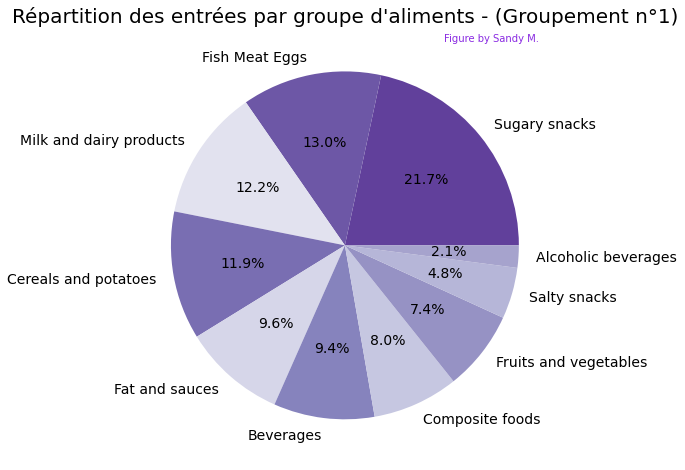

In [11]:
""" Cette fonction affiche un diagramme circulaire de la distribution d'une variable.
Entrées :
- df : le dataframe
- var : liste des variables d'intérêt
- title : titre du diagramme
- palette : choix de la palette de couleur

"""
# Diagramme circulaire
my_vis.diagramme_cercle(
    df_net.drop(df_net[df_net['pnns_groups_1'] == 'unknown'].index),
    ['pnns_groups_1'],
    "Répartition des entrées par groupe d'aliments - (Groupement n°1)",
    plt.cm.Purples)

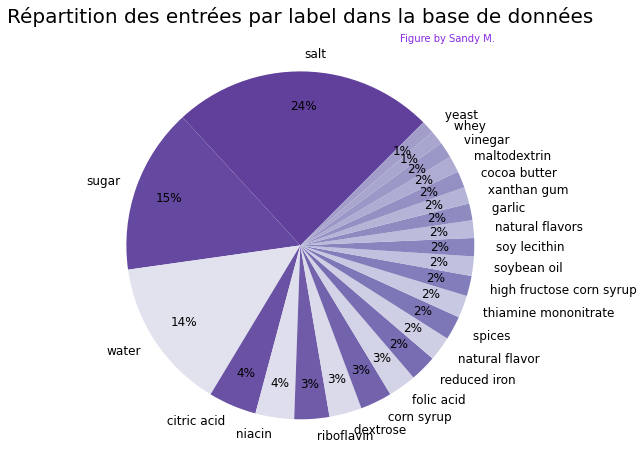

In [12]:
# Diagramme circulaire
my_vis.diagramme_cercle(
    compte_ingredients.drop(compte_ingredients[
        compte_ingredients['Nom_Ingredient'] == 'unknown'].index),
    ['Nom_Ingredient', 'Nombre'],
    "Répartition des entrées par label dans la base de données",
    plt.cm.Purples)

## Un anneau pour les admirer tous

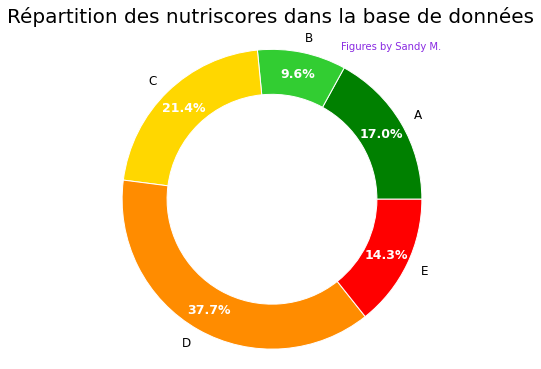

In [13]:
''' Cette fonction affiche un diagramme en anneau avec la palette de couleur correspondant aux modalités de la variable
Entrées :
data : le dataframe
colonne : la variable à représenter
colors : la palette de couleur
titre : le titre du diagramme
'''

# Diagramme en anneau
my_vis.score_ring(df_net, 'nutriscore_grade',
                  ['green', 'limegreen', 'gold', 'darkorange', 'red'],
                  "Répartition des nutriscores dans la base de données")

In [14]:
conditions = list(
    map(compte_additifs['Nom_Additif'].str.contains,
        ['E1', 'E2', 'E3', 'E4', 'E5']))
type_additif = [
    'Colorants', 'Conservateurs', 'Anti-oxydants', 'Agents de Texture',
    "Régulateurs d'acidité"
]
compte_additifs["type d'additif"] = np.select(conditions, type_additif,
                                              'autre')

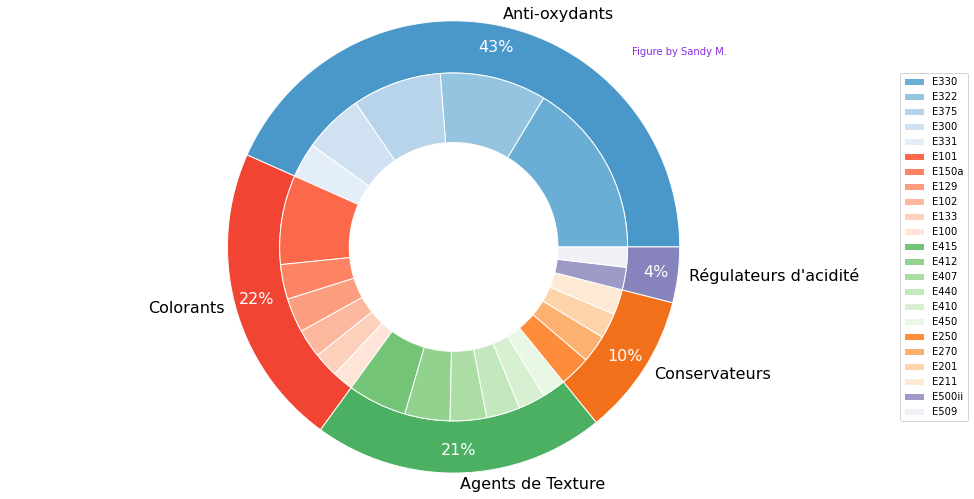

In [15]:
'''
Cette fonction affiche deux diagrammes en cercle imbriqués.
L'anneau extérieur correspond à une variable de regroupement. 
L'anneau intérieur représente les proportions des modalités de chaque regroupement. 
Un dégradé de couleur est appliqué sur l'anneau intérieur, correspondant au nombre de modalités par regroupement.
Entrées : 
data : le dataframe
var : l'ensemble des deux variables (var_int = var[0], var_ext = var[1])
'''

# Diagramme en anneau pour deux variables dont l'une regroupe les modalités de l'autre
my_vis.two_rings(
    compte_additifs.drop(
        compte_additifs[(compte_additifs.Nom_Additif == 'Unknown') |
                        (compte_additifs["type d'additif"] == 'autre')].index),
    ['Nom_Additif', "type d'additif"])

In [16]:
# Regroupement des packaging par matière
Dico_packaging_matiere = {
    'plastique': 'plastique',
    'carton': 'carton',
    'verre': 'verre',
    'conserve': 'metal',
    'papier': 'papier'
}
data_packaging['packaging_matiere'] = my_desc.detect_words_other(
    data_packaging['Emballage'].str.lower(), Dico_packaging_matiere, 'autre')
data_packaging['packaging_matiere'] = data_packaging[
    'packaging_matiere'].str.capitalize()
pack_labels = [
    name.capitalize() for name in list(Dico_packaging_matiere.values())
]


*Fonction by Sandy M.*

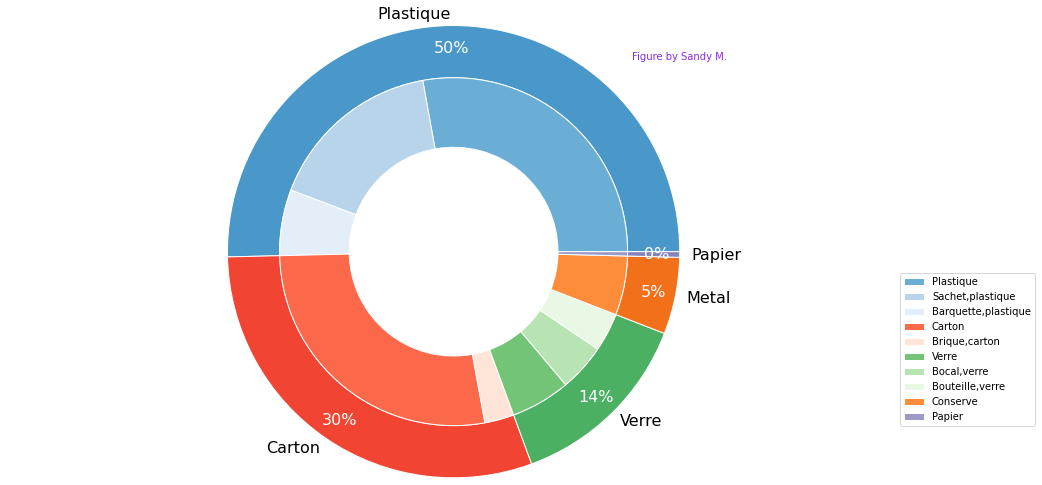

In [17]:
# Diagramme en anneau pour deux variables dont l'une regroupe les modalités de l'autre
my_vis.two_rings(
    data_packaging.drop(data_packaging[(
        data_packaging["packaging_matiere"] == 'Autre')].index),
    ['Emballage', "packaging_matiere"])

## “L'horizon souligne l'infini.”

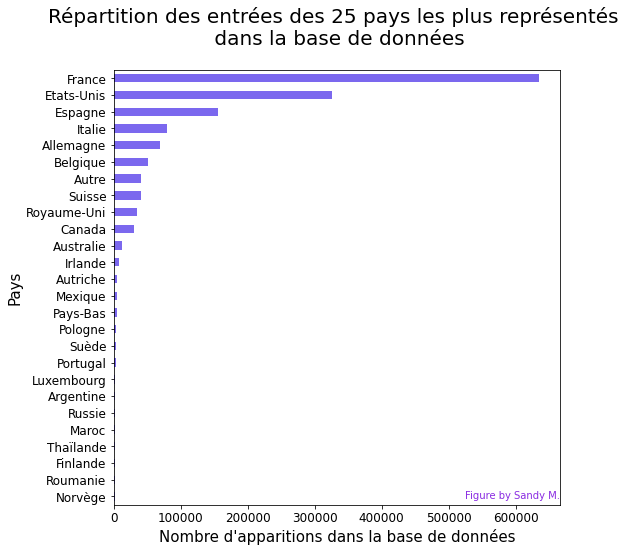

In [18]:
""" Cette fonction affiche un diagramme à barres horizontales. 
S'il y a trop de modalités, elle permet de choisir un taux minimum d'apparition dans la base de données et de regrouper les autres modalités dans une modalité "other"
Entrées : 
data : le dataframe
colonne : la variable d'intérêt
y_label : le label de l'axe des ordonnées
titre : le titre de la figure
other : le nom de la modalité de regroupement (par défaut = '')
taux : le taus seuil pour l'apparition des modalités
"""
# Histogramme horizontal
my_vis.histo_h(
    df_net.drop(df_net[df_net.countries == 'unknown'].index), 'countries',
    'Pays',
    "Répartition des entrées des 25 pays les plus représentés \n dans la base de données"
)

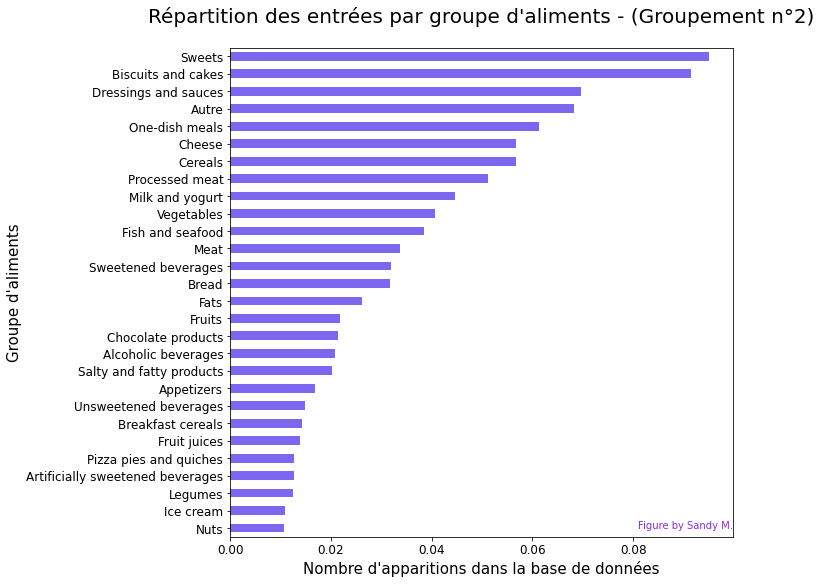

In [19]:
# Histogramme horizontal
my_vis.histo_h(df_net.drop(df_net[df_net['pnns_groups_2'] == 'unknown'].index), 'pnns_groups_2',"Groupe d'aliments","Répartition des entrées par groupe d'aliments - (Groupement n°2)", other = 'Autre', taux = 0.01)

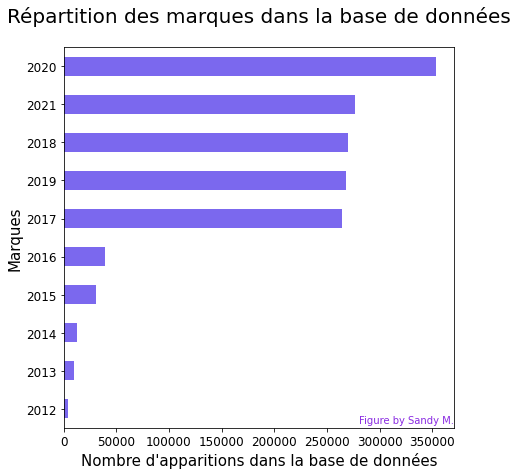

In [20]:
# Histogramme horizontal
my_vis.histo_h(df_net, 'year', 'Marques',
               'Répartition des marques dans la base de données')

## Pas de barre, pas de chocolat !

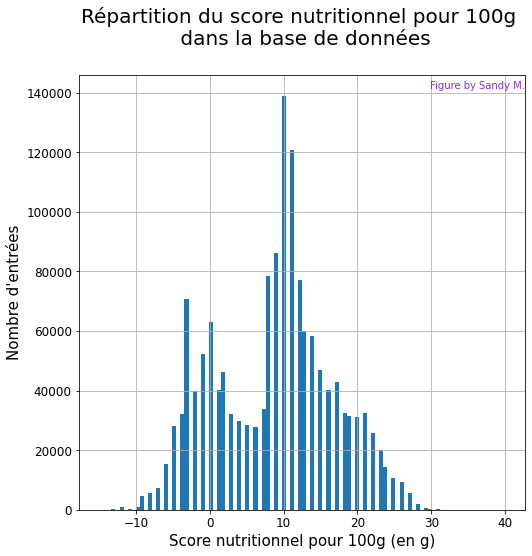

In [21]:
''' Cette fonction affiche un histogramme vertical.
Entrées :
df : le dataframe
variable : la variable à représenter
x_label : légende pour les abscisses
titre : titre de la figure    
'''

# Histogramme vertical
my_vis.histo_v(
    df_net, 'nutriscore_score', "Score nutritionnel pour 100g (en g)",
    "Répartition du score nutritionnel pour 100g \n dans la base de données")

## Dupont et Dupond ?

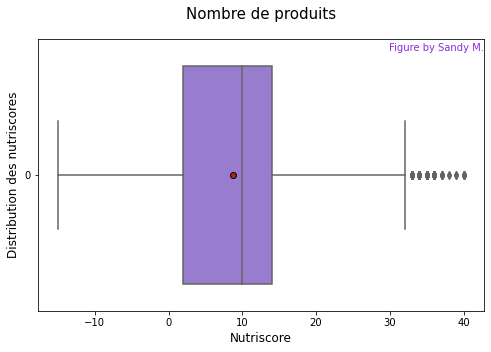

In [22]:
""" Cette fonction affiche une boîte à moustache pour chaque variable
Entrées :
- df : le dataframe
- var : la variable à représenter
- x_label : la légende pour son axe des abcisses
- y_label : la légende de son axe des ordonnées
- titre : le titre de son histogramme,
- la légende pour l'axe des ordonnées
- show_abb : True ou False pour l'affichage des valeurs aberrantes (par défaut = True)
- show_means : True ou False pour l'affichage de la moyenne (par défaut = True)
"""

# Diagramme en boîte à moustache
my_vis.moustache(df_net, 'nutriscore_score', 'Nutriscore',
                 'Distribution des nutriscores', 'Nombre de produits')

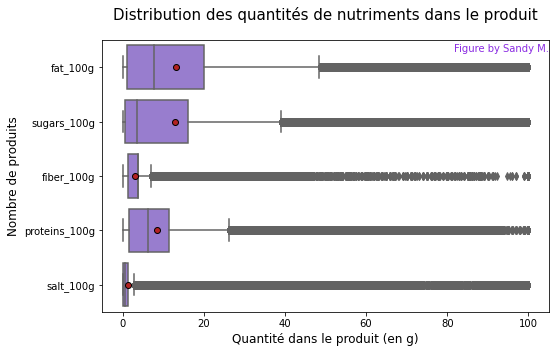

In [23]:
# Diagramme en boîte à moustache
my_vis.moustache(
    df_net,
    ['fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'],
    'Quantité dans le produit (en g)', 'Nombre de produits',
    'Distribution des quantités de nutriments dans le produit')

# Visualisations multivariées

## Visualisations statiques

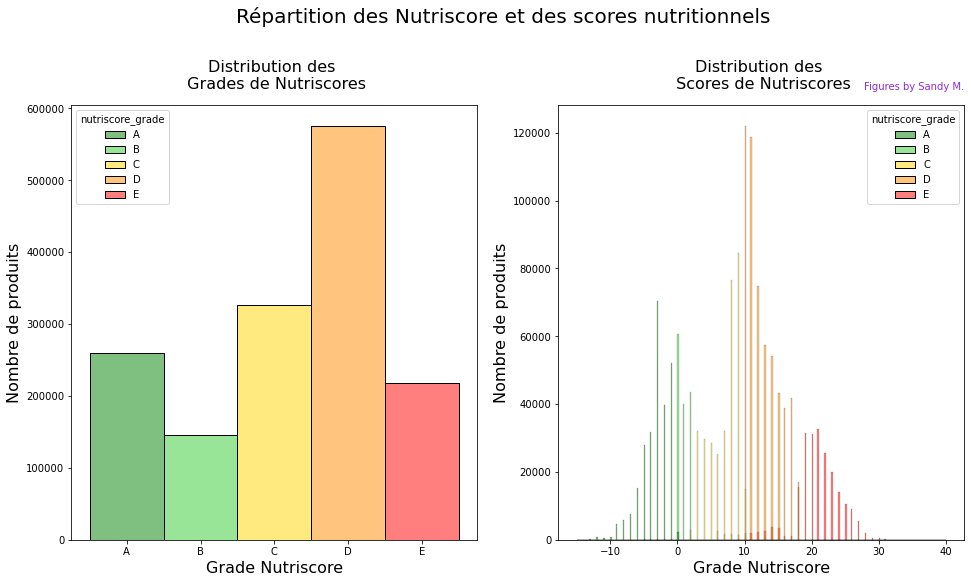

In [24]:
""" Cette fonction affiche deux histogrammes.
Le premier histogramme représente la distribution d'une variable qualitative avec un marquage de couleur selon cette variable.
Le deuxième histogramme représente la distribution d'une variable quantitative avec un marquage de couleur selon la variable qualitative.
Entrées :
df : le dataframe
var1 : la variable qualitative
var2 : la variable quantitative
x_label1 : la légende de l'axe des abscisses pour la variable qualitative
x_label2 : la légende de l'axe des abscisses pour la variable quantitative
y_label : la légende de l'axe des ordonnées
titre1 : le titre pour la variable qualitative
titre2 : le titre pour la variable quantitative
titre : le titre global de la figure
palette : la palette de couleur 
"""
# Histogrammes verticaux variables qualitatives et quantitatives
my_vis.histo_quali_quanti(
    df_net,
    "nutriscore_grade",
    "nutriscore_score",
    x_label1="Grade Nutriscore",
    x_label2="Score Nutriscore",
    y_label="Nombre de produits",
    titre1='Distribution des \n Grades de Nutriscores',
    titre2='Distribution des \n Scores de Nutriscores',
    titre=r"Répartition des Nutriscore et des scores nutritionnels",
    palette={
        "A": "green",
        "B": "limegreen",
        "C": "gold",
        "D": "darkorange",
        'E': 'red'
    })

## Visualisations intéractives

In [25]:
"""Cette fonction affiche une représentation intéractive de deux variables.
Elle possède un marquage de couleur pour une variable qualitative
Entrées :
df_interact : le dataframe
column_quali : la variable qualitative"""

columns_quali = ['nutriscore_grade']
columns_quanti = [
    'nutriscore_score', 'energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g'
]
%matplotlib widget
# 1 variable qualitative vs 2 variables quantitatives
my_move.interactif_plot(df_net[columns_quali + columns_quanti].sample(1000),
                       'nutriscore_grade')

interactive(children=(Dropdown(description='variable1', options=('nutriscore_grade', 'nutriscore_score', 'ener…

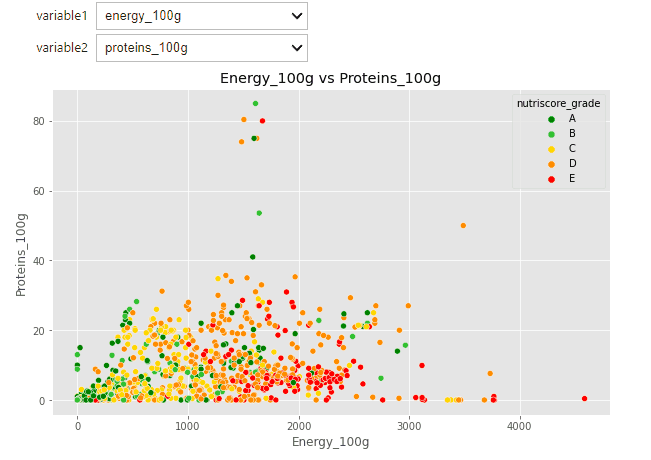

In [26]:
# Ordonnée :
# Proportion du nutriscore X pour l’année 20XX

visualisation_nutri_year(df_net)

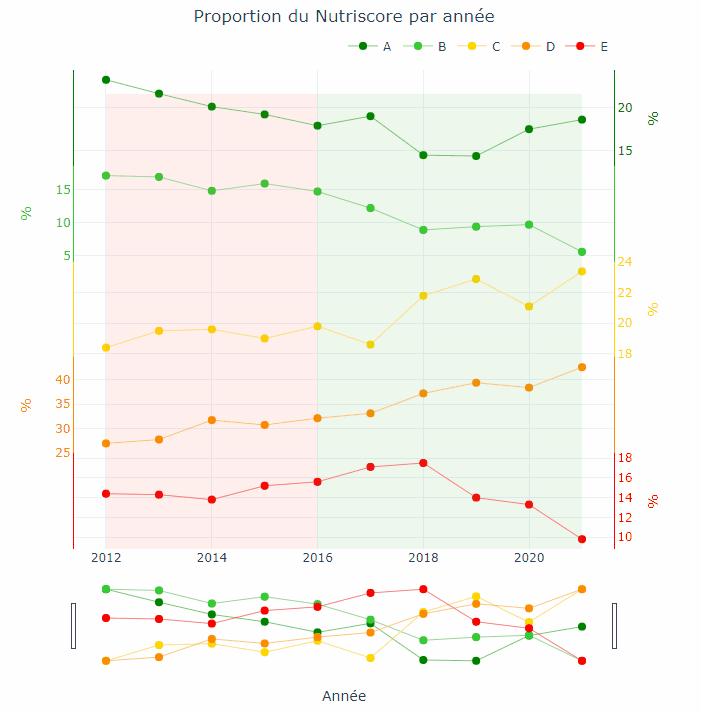

Chaque cercle = un produit

Axes du graphique : variable fat_100g (1) en fonction de variable sugars_100g (2)

Interactivité de la figure : variable nutriscore_grade (3)

Aire des cercles -> proportionnelle à energy-kcal_100g (4)

Couleur des cercles -> variable pnns_groups_1 (5)

Total : 5 variables !


In [27]:
visualisation_map(df_net, 10000)

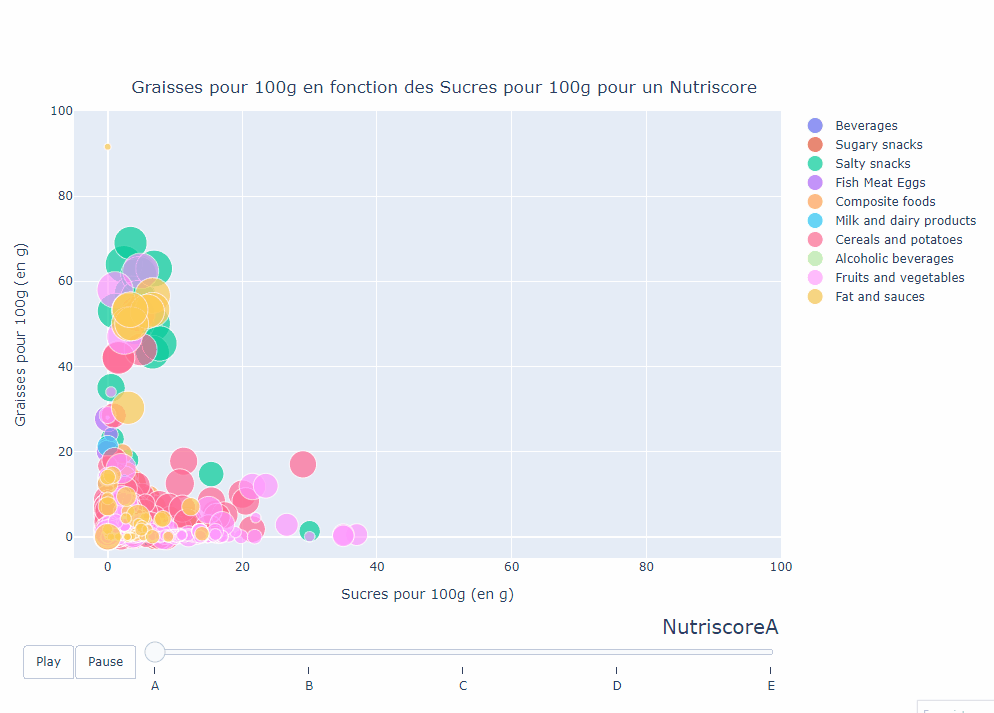

In [28]:
%matplotlib inline